In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import configparser
import os
from pathlib import Path

import aps
import aps.ai.autoalignment.beamline28IDB.optimization.analysis_utils as analysis
import aps.ai.autoalignment.beamline28IDB.optimization.common as opt_common
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import scipy
from IPython.display import Image, display_png

%matplotlib inline

28-ID - VKB Pitch Motor Resolution: 2e-05 deg
Qt5Agg: unable to import specified backend (or its dependency); no plots


**** The executable "caRepeater" couldn't be located
**** because of errno = "No such file or directory".
**** You may need to modify your PATH environment variable.
**** Unable to start "CA Repeater" process.
Traceback (most recent call last):
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot.py", line 57, in uti_plot_init
    _backend = uti_plot_matplotlib.Backend(backend, fname_format)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 27, in __init__
    backend = self._init_ipython(backend)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 724, in _init_ipython
    get_ipython().magic('matplotlib ' + b)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.

In [3]:
exp_type = 'peak_fwhm_nlpi'

In [4]:
#base_dir = Path(aps.__file__).parents[1]
#autoalign_dir = base_dir / f'work_directory/28-ID/AI/autoalignment/'
autoalign_dir = Path("/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/")
data_base_dir = autoalign_dir / exp_type / 'raw'
print(f'data base dir exists {data_base_dir.exists()}')


data base dir exists True


In [5]:
!ls {data_base_dir}

peak_fwhm_nlpi_ref_moo_150_2022-11-20_images
peak_fwhm_nlpi_ref_moo_150_2022-11-20_steps
peak_fwhm_nlpi_ref_moo_autofocusing.ini
peak_fwhm_nlpi_ref_moo_optimization_final_150_2022-11-20_10:29.gz


### peak_fwhm_150_2022-11-18

In [6]:
!ls {data_base_dir}

peak_fwhm_nlpi_ref_moo_150_2022-11-20_images
peak_fwhm_nlpi_ref_moo_150_2022-11-20_steps
peak_fwhm_nlpi_ref_moo_autofocusing.ini
peak_fwhm_nlpi_ref_moo_optimization_final_150_2022-11-20_10:29.gz


In [7]:
log_file = Path(data_base_dir / 'peak_fwhm_nlpi_ref_moo_optimization_final_150_2022-11-20_10:29.gz')
log_file.exists()

True

In [8]:
hist_dir = Path(data_base_dir / 'peak_fwhm_nlpi_ref_moo_150_2022-11-20_steps')
hist_dir.exists()

True

In [9]:
study = analysis.create_study_from_trials(log_file, directions=['minimize', 'minimize', 'minimize'])

Number of objectives is ignored if directions are supplied.


[I 2022-11-21 02:00:30,130] A new study created in memory with name: no-name-d270dfb2-3b38-42a1-9d10-c8b650109792


In [10]:
n_steps = len(study.trials)

In [11]:
hists = analysis.load_histograms_from_files(n_steps, hist_dir, extension='gz')

In [12]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [13]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)
print("Actual fwhm (not with reference)", opt_common._get_fwhm_from_dw(nash_trial.user_attrs["dw"]))

[64, 83, 78, 107, 113, 91, 11, 9, 74, 16, 83, 90, 77, 87, 87, 76]
104 [0.0022991581379456284, 0.004826228704482392, -11.087455749511719]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3922740120146745, 'h_fwhm': 0.013656322371469187, 'h_centroid': -0.0005172957123479316, 'h_peak': -0.0022760537285780058, 'v_sigma': 0.45985731744186714, 'v_fwhm': 0.009103556076592856, 'v_centroid': 0.00559521491437831, 'v_peak': -0.00032512700273549627, 'integral_intensity': 282.4174778859236, 'peak_intensity': 65346.3, 'gaussian_fit': {}}}
Actual fwhm (not with reference) 0.01641249139994171


Trial number 64
Trial values: peak_distance 6.836e-03 fwhm 3.372e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39074559830850003, 'h_fwhm': 0.0149569245020853, 'h_centroid': 0.0007522156862000973, 'h_peak': 0.006828161185734166, 'v_sigma': 0.45795090412721434, 'v_fwhm': 0.008453302071121938, 'v_centroid': 0.00593504216296839, 'v_peak': 0.0003251270027353485, 'integral_intensity': 284.83759523129294, 'peak_intensity': 55471.43, 'gaussian_fit': {}}}
Actual fwhm 0.01718045128821458


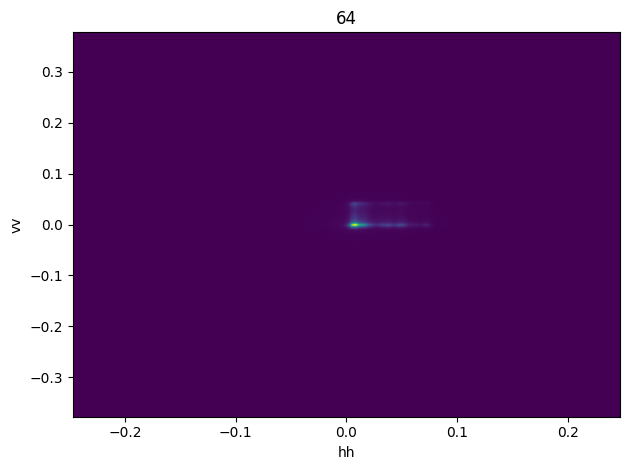

Trial number 83
Trial values: peak_distance 1.352e-02 fwhm 1.433e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3912001098116636, 'h_fwhm': 0.01885873089393364, 'h_centroid': -4.146655542192068e-05, 'h_peak': 0.0022760537285780058, 'v_sigma': 0.45849250768704364, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.004700113717293342, 'v_peak': 0.01333020711215313, 'integral_intensity': 284.1291375084293, 'peak_intensity': 65312.203, 'gaussian_fit': {}}}
Actual fwhm 0.01974591053691665


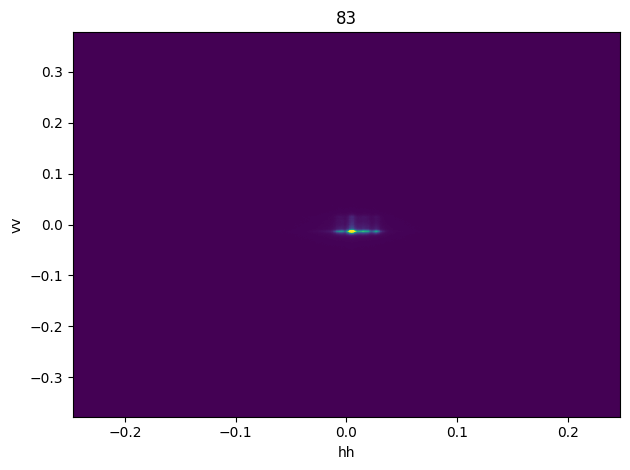

Trial number 93
Trial values: peak_distance 2.299e-03 fwhm 5.373e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3908096545819684, 'h_fwhm': 0.017558128763317526, 'h_centroid': -0.0006155865812202121, 'h_peak': 0.0016257526632700889, 'v_sigma': 0.4580844375023458, 'v_fwhm': 0.012354826103947447, 'v_centroid': 0.0052718238431906095, 'v_peak': 0.0016256350136771857, 'integral_intensity': 284.5693999515321, 'peak_intensity': 64166.56, 'gaussian_fit': {}}}
Actual fwhm 0.0214692713832589


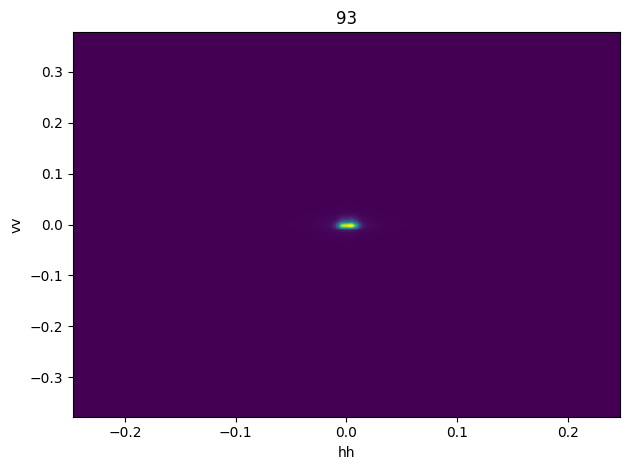

Trial number 94
Trial values: peak_distance 7.871e-03 fwhm 3.575e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.391234212074737, 'h_fwhm': 0.01690782769800947, 'h_centroid': -0.0010659630794244146, 'h_peak': -0.006177860120426101, 'v_sigma': 0.45872570890776365, 'v_fwhm': 0.010404064087534692, 'v_centroid': 0.005872038952615344, 'v_peak': -0.004876905041031705, 'integral_intensity': 283.43502322636016, 'peak_intensity': 65372.902, 'gaussian_fit': {}}}
Actual fwhm 0.01985243529149775


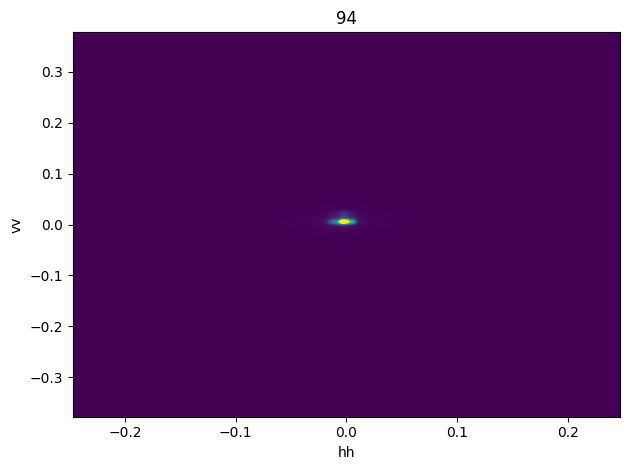

Trial number 104
Trial values: peak_distance 2.299e-03 fwhm 4.826e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3922740120146745, 'h_fwhm': 0.013656322371469187, 'h_centroid': -0.0005172957123479316, 'h_peak': -0.0022760537285780058, 'v_sigma': 0.45985731744186714, 'v_fwhm': 0.009103556076592856, 'v_centroid': 0.00559521491437831, 'v_peak': -0.00032512700273549627, 'integral_intensity': 282.4174778859236, 'peak_intensity': 65346.3, 'gaussian_fit': {}}}
Actual fwhm 0.01641249139994171


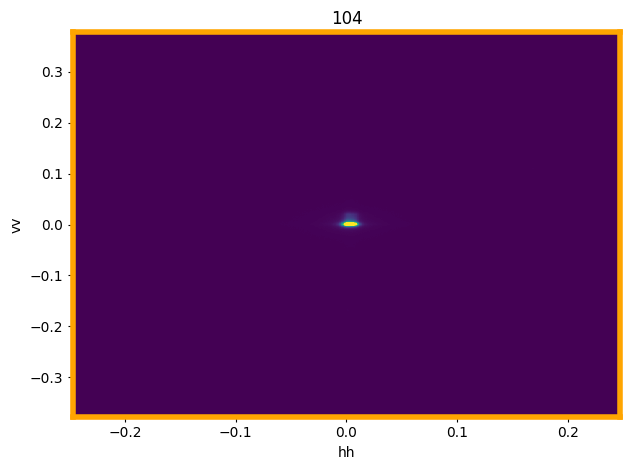

Trial number 105
Trial values: peak_distance 1.489e-02 fwhm 2.114e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39110435304759467, 'h_fwhm': 0.018208429828625583, 'h_centroid': 0.00013772509411863476, 'h_peak': 0.008779064381658213, 'v_sigma': 0.4584555628515072, 'v_fwhm': 0.009103556076592856, 'v_centroid': 0.0064945395547050255, 'v_peak': -0.012029699101211442, 'integral_intensity': 284.087270899167, 'peak_intensity': 65447.703, 'gaussian_fit': {}}}
Actual fwhm 0.020357348797514194


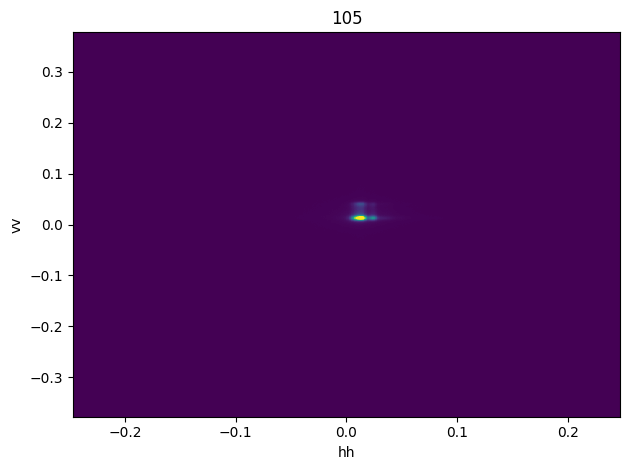

Trial number 109
Trial values: peak_distance 6.227e-02 fwhm 4.675e-04
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.391156608147699, 'h_fwhm': 0.017558128763317526, 'h_centroid': 0.003708541765676726, 'h_peak': 0.06145345067160719, 'v_sigma': 0.45818242053956093, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.00509798082896154, 'v_peak': 0.01007893708479876, 'integral_intensity': 284.40377380499973, 'peak_intensity': 65300.293, 'gaussian_fit': {}}}
Actual fwhm 0.0189591758401199


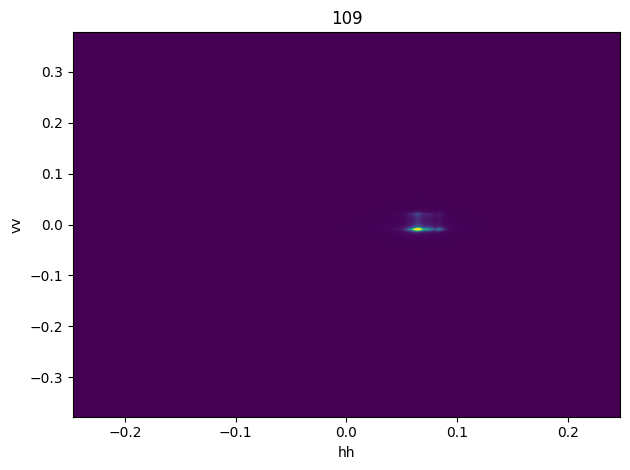

Trial number 113
Trial values: peak_distance 7.527e-02 fwhm 1.709e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39166580553076097, 'h_fwhm': 0.019509031959241696, 'h_centroid': 0.004271021678138559, 'h_peak': 0.07120796665122743, 'v_sigma': 0.4585908856117704, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.007415736217908392, 'v_peak': -0.024384525205158377, 'integral_intensity': 283.69918610484103, 'peak_intensity': 65337.56, 'gaussian_fit': {}}}
Actual fwhm 0.021011660741159278


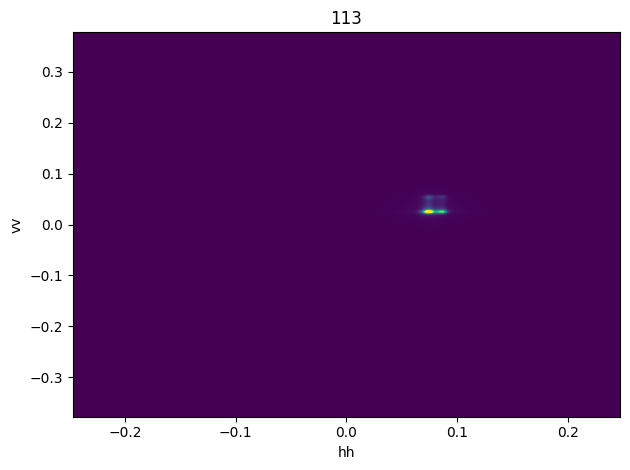

Trial number 119
Trial values: peak_distance 1.028e-03 fwhm 1.016e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3907633862684574, 'h_fwhm': 0.027312644742938375, 'h_centroid': -1.058066317238815e-05, 'h_peak': 0.0009754515979620237, 'v_sigma': 0.4580528869471397, 'v_fwhm': 0.01105431809300561, 'v_centroid': 0.005686203749902724, 'v_peak': -0.00032512700273549627, 'integral_intensity': 284.52883237087, 'peak_intensity': 65296.68, 'gaussian_fit': {}}}
Actual fwhm 0.029464869104669552


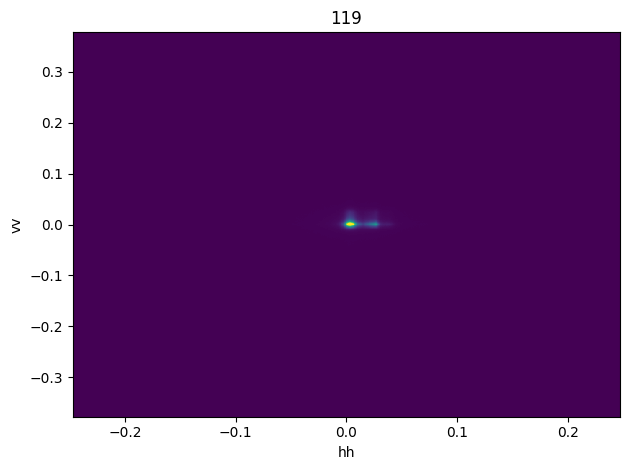

Trial number 122
Trial values: peak_distance 4.506e-02 fwhm 9.166e-04
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39090027982729375, 'h_fwhm': 0.017558128763317526, 'h_centroid': -0.0028539007309597575, 'h_peak': -0.03609170912459473, 'v_sigma': 0.4582834870965657, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.007512274659071644, 'v_peak': -0.026985541227041904, 'integral_intensity': 284.3318942224523, 'peak_intensity': 65287.33, 'gaussian_fit': {}}}
Actual fwhm 0.019213938814935848


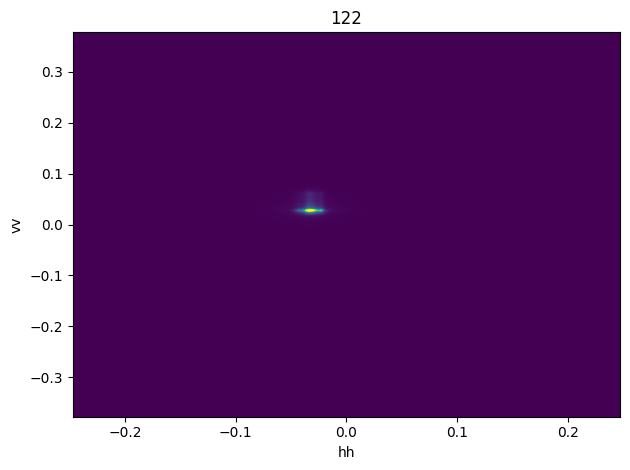

Trial number 123
Trial values: peak_distance 1.196e-02 fwhm 5.201e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39189354650326513, 'h_fwhm': 0.01300602130616113, 'h_centroid': 2.0915470679172543e-05, 'h_peak': 0.008779064381658213, 'v_sigma': 0.45942113868909634, 'v_fwhm': 0.008453302071121938, 'v_centroid': 0.005242820874255316, 'v_peak': 0.008128175068386078, 'integral_intensity': 282.92063496375533, 'peak_intensity': 65410.22, 'gaussian_fit': {}}}
Actual fwhm 0.015511766698927357


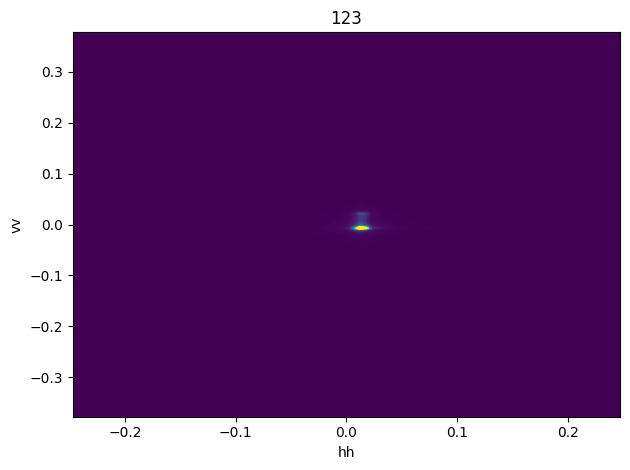

Trial number 129
Trial values: peak_distance 1.028e-03 fwhm 5.942e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39079275650926293, 'h_fwhm': 0.013656322371469187, 'h_centroid': -0.0005425019058654112, 'h_peak': 0.00032515053265395866, 'v_sigma': 0.45811848483893886, 'v_fwhm': 0.01105431809300561, 'v_centroid': 0.005708462898544819, 'v_peak': 0.000975381008206341, 'integral_intensity': 284.3715416578559, 'peak_intensity': 65067.348, 'gaussian_fit': {}}}
Actual fwhm 0.01756966389020692


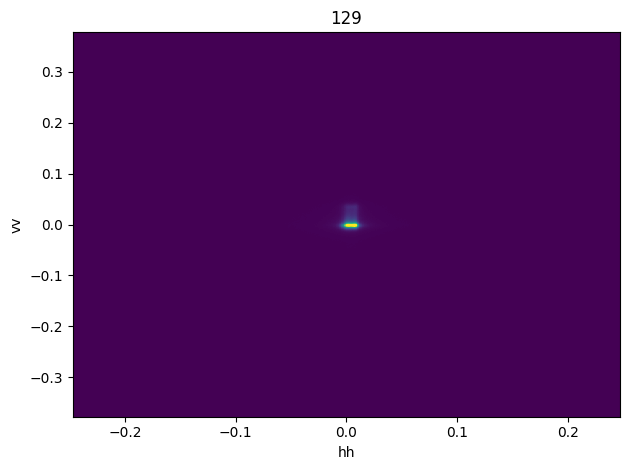

Trial number 141
Trial values: peak_distance 1.150e-02 fwhm 6.044e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39098917547333417, 'h_fwhm': 0.01300602130616113, 'h_centroid': -0.0013682405352176408, 'h_peak': -0.010079666512274196, 'v_sigma': 0.45842344513312366, 'v_fwhm': 0.010404064087534692, 'v_centroid': 0.005306170781970931, 'v_peak': 0.0055271590465025494, 'integral_intensity': 283.83401444830906, 'peak_intensity': 65379.09, 'gaussian_fit': {}}}
Actual fwhm 0.01665536369323247


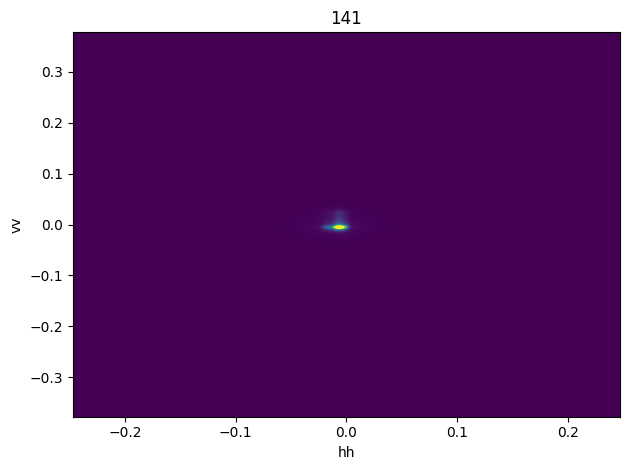

Trial number 142
Trial values: peak_distance 1.224e-02 fwhm 2.398e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39084207588642633, 'h_fwhm': 0.015607225567393357, 'h_centroid': -0.0001375160374650075, 'h_peak': 0.0022760537285780058, 'v_sigma': 0.45818976341891016, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.004926493648760577, 'v_peak': 0.012029699101211292, 'integral_intensity': 284.24215299665144, 'peak_intensity': 65266.0, 'gaussian_fit': {}}}
Actual fwhm 0.017168225091104924


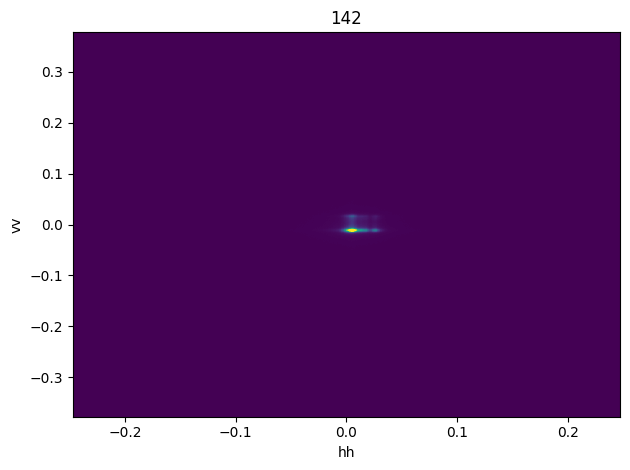

Trial number 144
Trial values: peak_distance 8.928e-03 fwhm 4.675e-04
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.391262709298883, 'h_fwhm': 0.017558128763317526, 'h_centroid': 0.00021377929023788655, 'h_peak': 0.008779064381658213, 'v_sigma': 0.4585268011099353, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.005597161592970912, 'v_peak': 0.0016256350136771857, 'integral_intensity': 283.9244593146018, 'peak_intensity': 65062.82, 'gaussian_fit': {}}}
Actual fwhm 0.0189591758401199


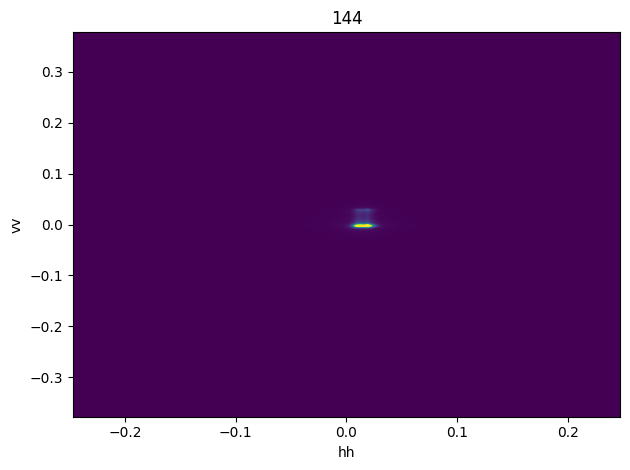

Trial number 147
Trial values: peak_distance 5.141e-03 fwhm 1.010e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39186096360632433, 'h_fwhm': 0.010404817044928905, 'h_centroid': -0.0008242798594787493, 'h_peak': -0.0042269569245020535, 'v_sigma': 0.4593344987019292, 'v_fwhm': 0.013655334114889284, 'v_centroid': 0.0058562667212124775, 'v_peak': -0.002926143024619023, 'integral_intensity': 283.2121315690332, 'peak_intensity': 65387.098, 'gaussian_fit': {}}}
Actual fwhm 0.01716765468920266


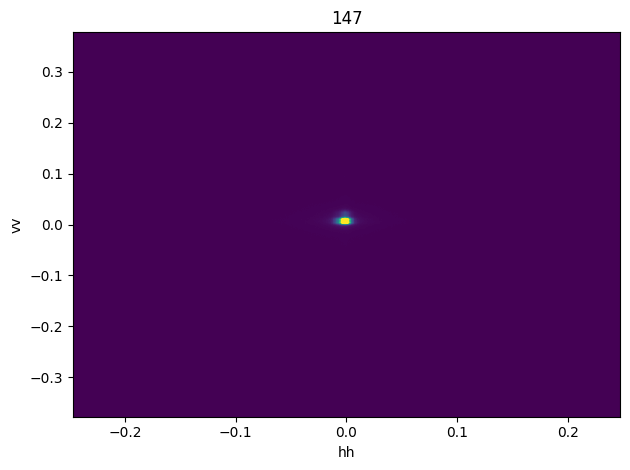

In [14]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    print("Actual fwhm", opt_common._get_fwhm_from_dw(t.user_attrs["dw"]))
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    if t.number == nash_trial.number:
        for axis in ['top','bottom','left','right']:
            plt.gca().spines[axis].set_linewidth(4)
            plt.gca().spines[axis].set_color('orange')
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.title(t.number)
    plt.tight_layout()
    plt.show()

In [15]:
study.best_trials[0].values

[0.0068358973621810825, 0.003372298236505203, -10.923623085021973]

In [23]:
pareto_df = analysis.get_pareto_dataframe_from_study(study, ['peak_distance', 'delta_fwhm', 'nlpi'])

In [24]:
pareto_df

,number,peak_distance,delta_fwhm,nlpi,h_peak,v_peak,h_fwhm,v_fwhm,peak_intensity
64,64,0.006836,0.003372,-10.923623,0.006828,0.000325,0.014957,0.008453,55471.429688
83,83,0.013523,0.001433,-11.086934,0.002276,0.013330,0.018859,0.005852,65312.203125
93,93,0.002299,0.005373,-11.069238,0.001626,0.001626,0.017558,0.012355,64166.558594
94,94,0.007871,0.003575,-11.087863,-0.006178,-0.004877,0.016908,0.010404,65372.902344
104,104,0.002299,0.004826,-11.087456,-0.002276,-0.000325,0.013656,0.009104,65346.300781
105,105,0.014892,0.002114,-11.089006,0.008779,-0.012030,0.018208,0.009104,65447.703125
109,109,0.062274,0.000468,-11.086752,0.061453,0.010079,0.017558,0.007153,65300.292969
113,113,0.075267,0.001709,-11.087322,0.071208,-0.024385,0.019509,0.007803,65337.558594
119,119,0.001028,0.010157,-11.086697,0.000975,-0.000325,0.027313,0.011054,65296.679688
122,122,0.045065,0.000917,-11.086554,-0.036092,-0.026986,0.017558,0.007803,65287.328125


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_90767/2375896861.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "delta_fwhm", "nlpi"], include_dominated_trials=False)


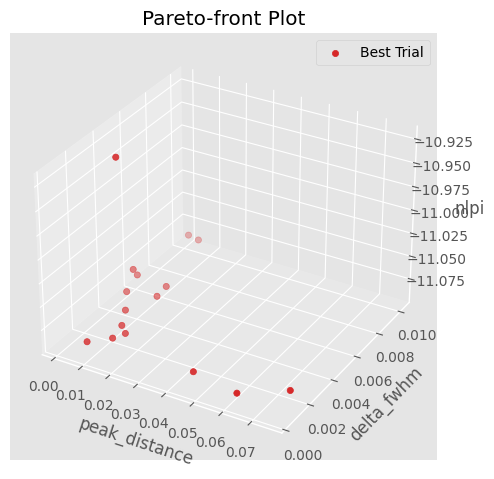

In [27]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "delta_fwhm", "nlpi"], include_dominated_trials=False)
#plt.scatter(*nash_trial.values, color='orange', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_90767/320309324.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


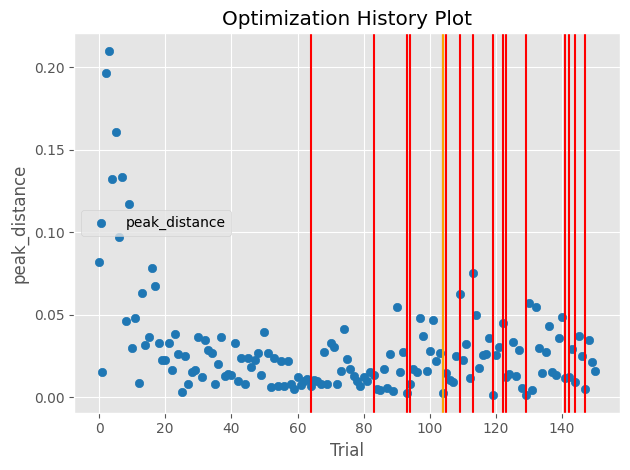

In [30]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_90767/1279663034.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="delta_fwhm")


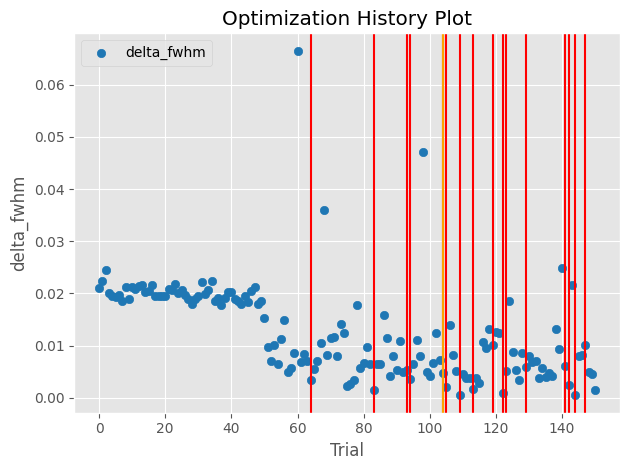

In [31]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="delta_fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_90767/3199083138.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[2], target_name="nlpi")


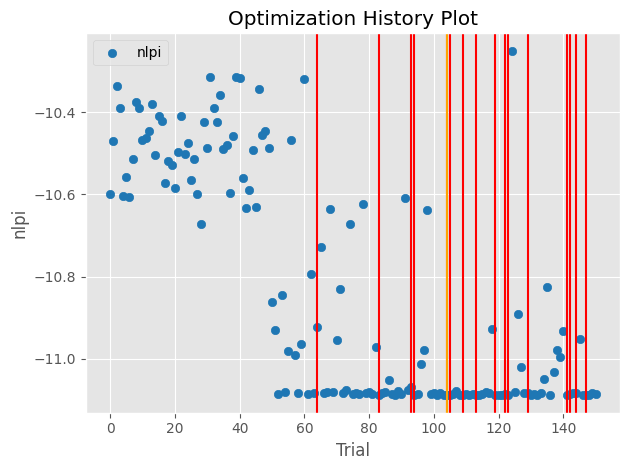

In [32]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[2], target_name="nlpi")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [33]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    isum1, wsum1 = analysis.calculate_weighted_sum(h, threshold=0)
    isum2, wsum2 = analysis.calculate_weighted_sum(h)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_90767/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


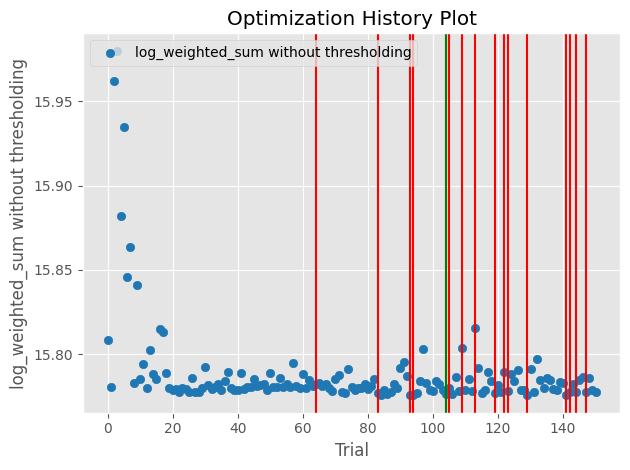

In [34]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_90767/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


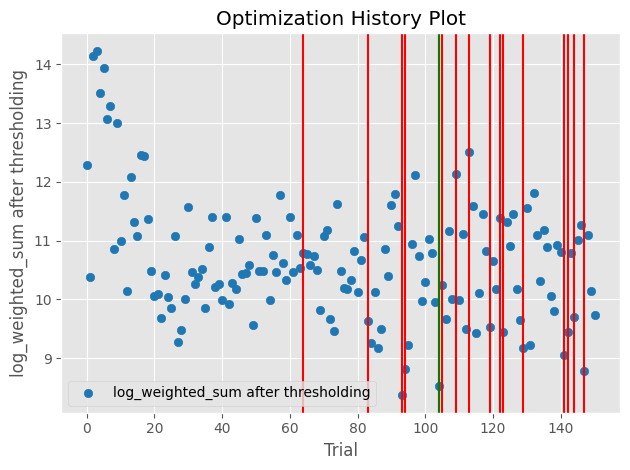

In [35]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [38]:
test_val_fns = [lambda t: t.values[0], lambda t: t.values[2], lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins))

147


93 [0.0022990782761408996, -11.06923770904541, 8.363033802859627]


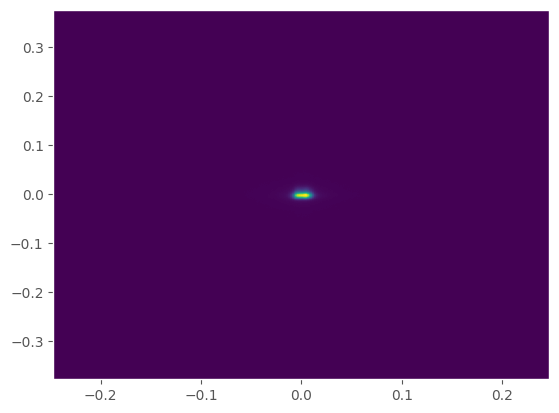

104 [0.0022991581379456284, -11.087455749511719, 8.519233507326788]


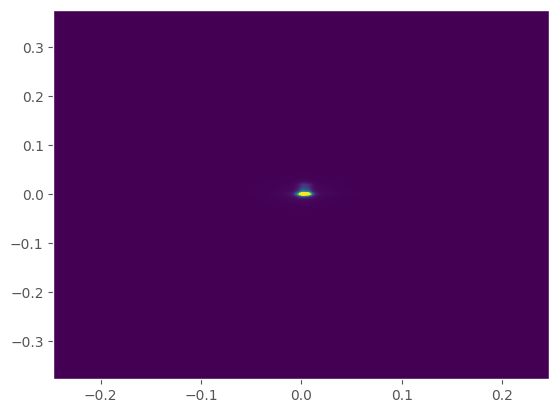

105 [0.014892468965318923, -11.089006423950195, 10.237216413536215]


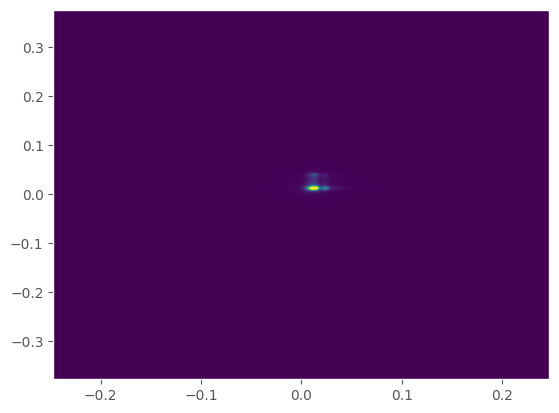

119 [0.001028208825032363, -11.08669662475586, 9.529927924553148]


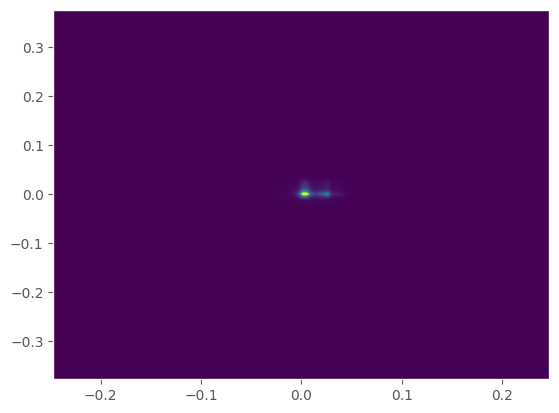

123 [0.011964079628606327, -11.088434219360352, 9.448400237352246]


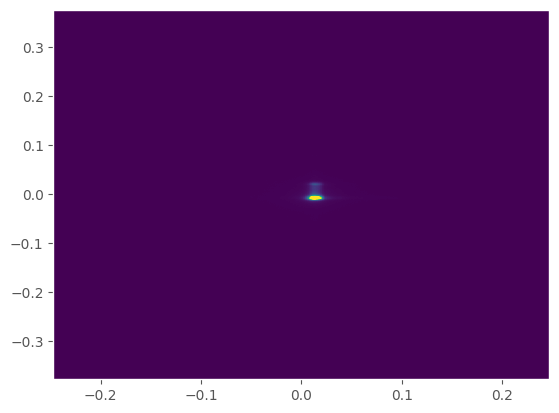

129 [0.0010281492985236974, -11.083178520202637, 9.164940177125018]


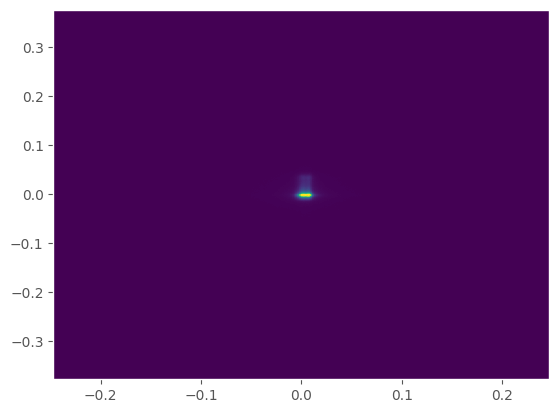

147 [0.005140960789786518, -11.088080406188965, 8.782194351365327]


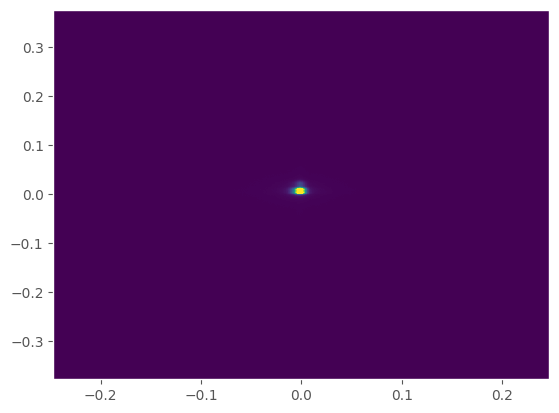

In [39]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [40]:
test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins), domins[np.argmax(domins)])

128 118


52 [0.0061864095593048936, 0.01353156293804043, 10.484677756540242]


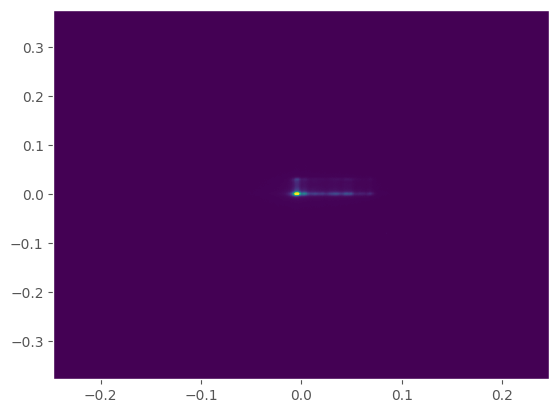

61 [0.007371438929209106, 0.012825703239759859, 10.47085698814649]


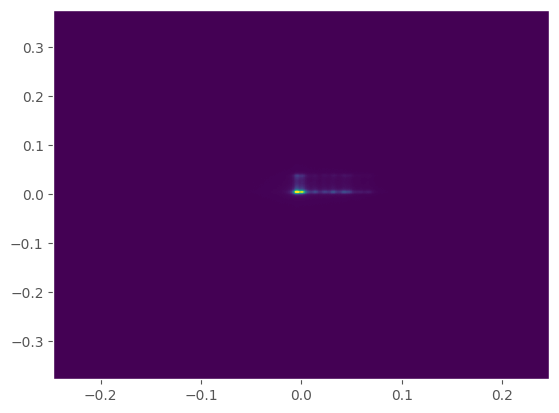

67 [0.007870710102262674, 0.012491324333105883, 10.729940729004056]


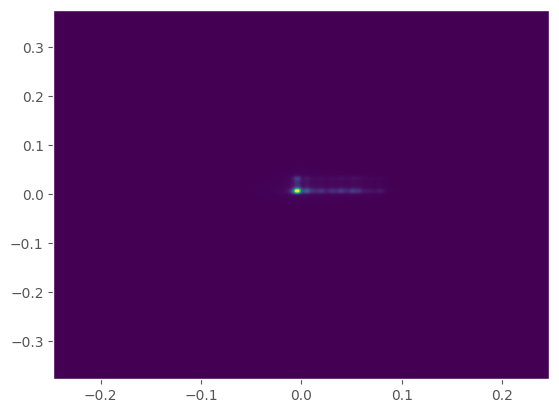

81 [0.010084908753507373, 0.011955207035933274, 10.672782279196696]


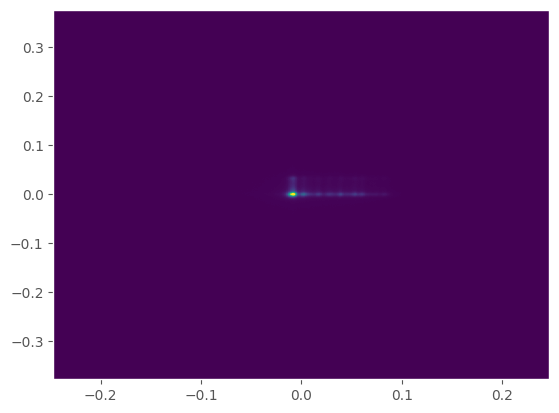

85 [0.004337751121995487, 0.014438668705280672, 10.123642024437757]


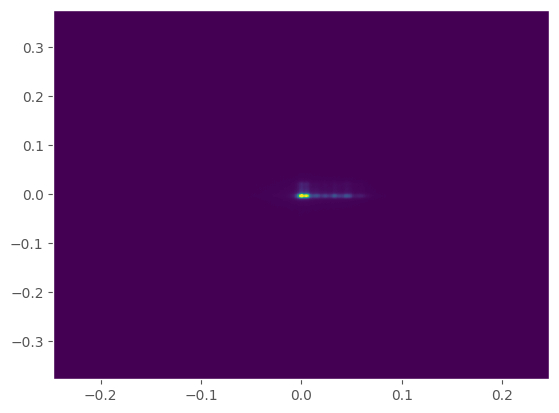

89 [0.003928760152109048, 0.014261733024265038, 10.396906261153699]


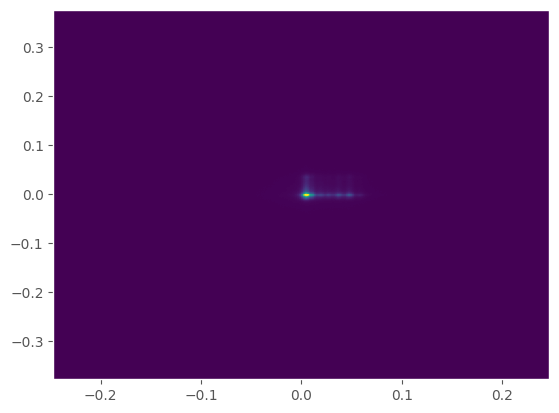

93 [0.0022990782761408996, 0.0214692713832589, 8.363033802859627]


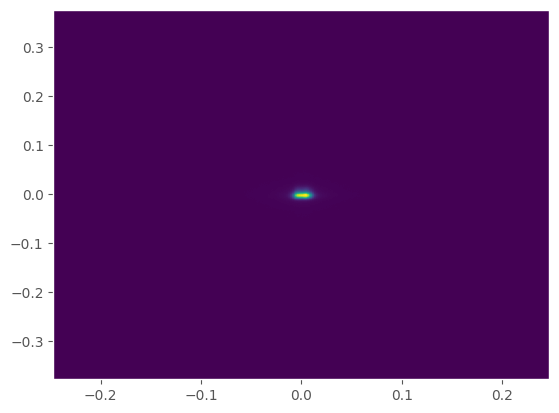

104 [0.0022991581379456284, 0.01641249139994171, 8.519233507326788]


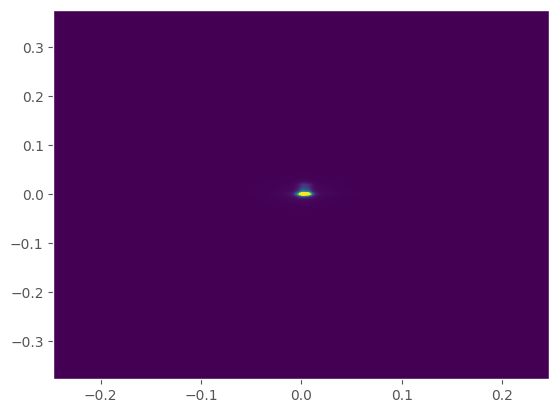

117 [0.02632159082891191, 0.011073893725051806, 11.449763429116938]


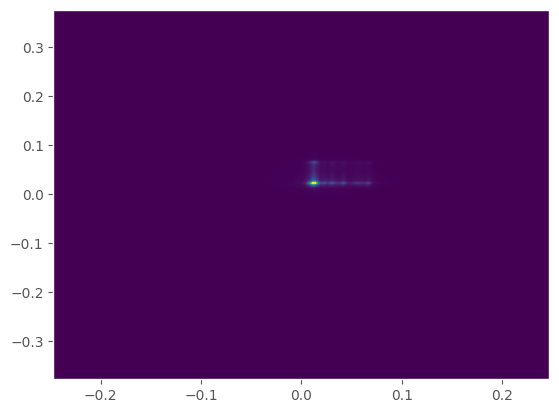

123 [0.011964079628606327, 0.015511766698927357, 9.448400237352246]


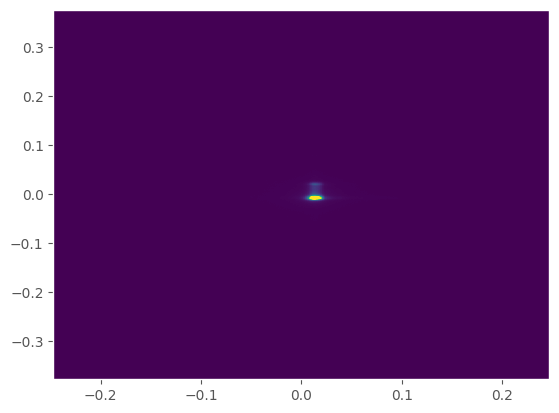

128 [0.005687508695284694, 0.013794469656846086, 9.649990257966993]


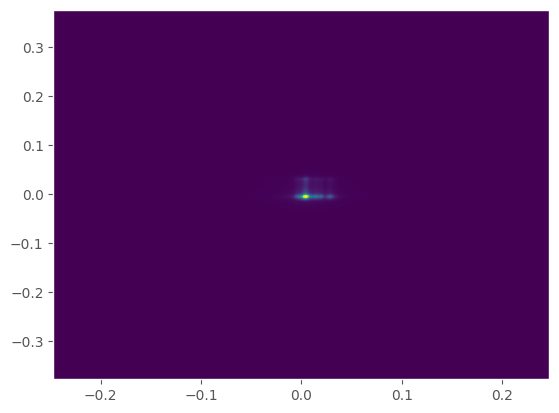

129 [0.0010281492985236974, 0.01756966389020692, 9.164940177125018]


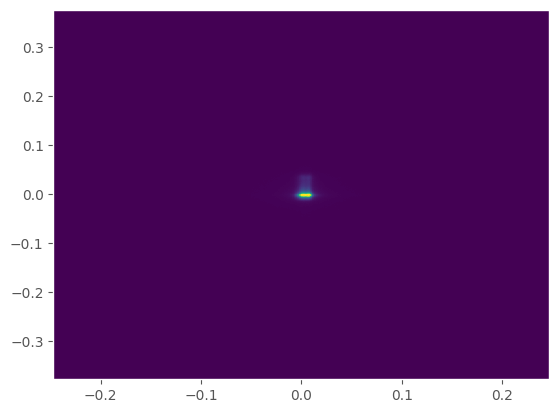

In [ ]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

### peak_fwhm_ref_150_2022-11-18  - This trial is invalid because we are using the same reference beam as initialization

### peak_fwhm_ref_150_2022-11-20

In [182]:
!ls $data_base_dir

Screen Shot 2022-11-20 at 10.35.04 AM.png
peak_fwhm_150_2022-11-18_images
peak_fwhm_150_2022-11-18_steps
peak_fwhm_autofocusing.ini
peak_fwhm_optimization_final_150_2022-11-18_16:24.pkl
peak_fwhm_ref_150_2022-11-18_images
peak_fwhm_ref_150_2022-11-18_steps
peak_fwhm_ref_150_2022-11-20_images
peak_fwhm_ref_150_2022-11-20_steps
peak_fwhm_ref_autofocusing.ini
peak_fwhm_ref_autofocusing_2022-11-18.ini
peak_fwhm_ref_autofocusing_2022-11-20.ini
peak_fwhm_ref_optimization_final_150_2022-11-18_01:23.pkl
peak_fwhm_ref_optimization_final_150_2022-11-20_14:09.gz
preliminary


In [187]:
!cat {data_base_dir}/peak_fwhm_ref_autofocusing_2022-11-20.ini

[Motor-Ranges]
hkb-bender-1 = -30.0, 30.0
hkb-bender-2 = -20.0, 30.0
hkb-pitch = -0.002, 0.002
hkb-translation = -0.03, 0.03
vkb-bender = -40.0, 40.0
vkb-pitch = -0.002, 0.002
vkb-translation = -0.03, 0.03
hkb-bender-threshold = 0.2
hkb-bender-n-threshold-checks = 3

[Motor-Boundaries]
boundaries-hkb-bender-1 = -200.0, -50.0
boundaries-hkb-bender-2 = -175.0, -50.0
boundaries-hkb-pitch = 0.168, 0.174
boundaries-hkb-translation = -0.5, 0.5
boundaries-vkb-bender = 0.0, 600.0
boundaries-vkb-pitch = 0.168, 0.174
boundaries-vkb-translation = -0.5, 0.5

[Optimization-Parameters]
sum-intensity-soft-constraint = 7000.0
sum-intensity-hard-constraint = 6500.0
centroid-sigma-threshold-dependency = 1
centroid-sigma-hard-thresholds-tuple = 0.01, 0.03
n-pitch-trans-motor-trials = 50
n-all-motor-trials = 100
loss-parameters = peak_distance, fwhm
log-parameters-weight = 0.25
reference-position = 0.0, 0.0
reference-size = 0.018, 0.007
moo-thresholds = 
moo-thresholds-position = 0.05
moo-thresholds-size 

In [188]:
log_file = Path(data_base_dir / 'peak_fwhm_ref_optimization_final_150_2022-11-20_14:09.gz')
log_file.exists()

True

In [189]:
hist_dir = Path(data_base_dir / 'peak_fwhm_ref_150_2022-11-20_steps')
hist_dir.exists()

True

In [190]:
study = analysis.create_study_from_trials(log_file)

[I 2022-11-21 01:41:34,636] A new study created in memory with name: no-name-671ecbf4-819d-40da-abfc-63d16cc03d87


Assuming minimization for all objectives.


In [191]:
n_steps = len(study.trials)

In [192]:
hists = analysis.load_histograms_from_files(n_steps, hist_dir, extension='gz')

In [193]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [194]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)

[147, 133]
79 [0.00045981565522817996, 0.0014334106393386306]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3905670010735646, 'h_fwhm': 0.01885873089393364, 'h_centroid': 0.0005517121010972792, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.45766873625762505, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.0057594896642604865, 'v_peak': -0.00032512700273549627, 'integral_intensity': 284.9587837744583, 'peak_intensity': 65045.875, 'gaussian_fit': {}}}


Trial number 79
Trial values: peak_distance 4.598e-04 fwhm 1.433e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3905670010735646, 'h_fwhm': 0.01885873089393364, 'h_centroid': 0.0005517121010972792, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.45766873625762505, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.0057594896642604865, 'v_peak': -0.00032512700273549627, 'integral_intensity': 284.9587837744583, 'peak_intensity': 65045.875, 'gaussian_fit': {}}}
Actual fwhm 0.01974591053691665


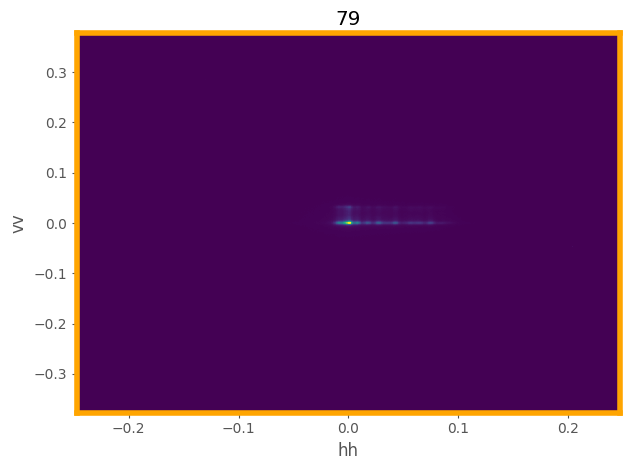

Trial number 98
Trial values: peak_distance 6.583e-03 fwhm 2.584e-04
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3906831300399076, 'h_fwhm': 0.018208429828625583, 'h_centroid': 0.0005740670810941984, 'h_peak': 0.0035766558591939883, 'v_sigma': 0.45780228752575697, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.006148491649214716, 'v_peak': -0.0055271590465025494, 'integral_intensity': 285.0382951500322, 'peak_intensity': 64420.555, 'gaussian_fit': {}}}
Actual fwhm 0.019562959379688178


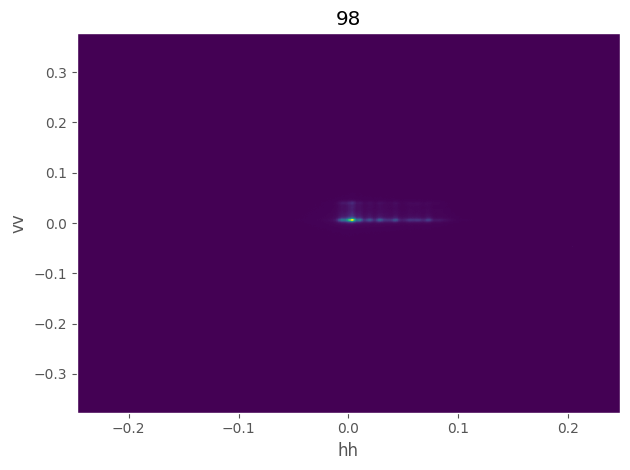

In [196]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    print("Actual fwhm", opt_common._get_fwhm_from_dw(t.user_attrs["dw"]))
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    if t.number == nash_trial.number:
        for axis in ['top','bottom','left','right']:
            plt.gca().spines[axis].set_linewidth(4)
            plt.gca().spines[axis].set_color('orange')
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.title(t.number)
    plt.tight_layout()
    plt.show()

Result: Seems like the beam is too spread out in all the cases.

In [203]:
pareto_df = analysis.get_pareto_dataframe_from_study(study, ['peak', 'delta_fwhm'])

In [204]:
pareto_df

,number,peak,delta_fwhm,h_peak,v_peak,h_fwhm,v_fwhm,peak_intensity
79,79,0.000460,0.001433,-0.000325,-0.000325,0.018859,0.005852,65045.875000
98,98,0.006583,0.000258,0.003577,-0.005527,0.018208,0.007153,64420.554688


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_89192/646137518.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "fwhm"], include_dominated_trials=False)


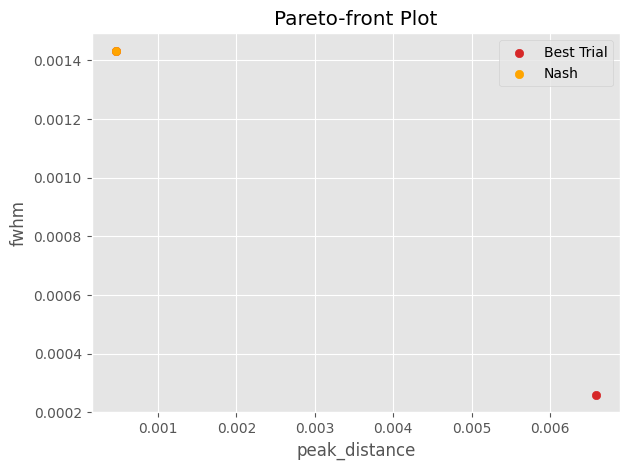

In [205]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "fwhm"], include_dominated_trials=False)
plt.scatter(*nash_trial.values, color='orange', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_89192/320309324.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


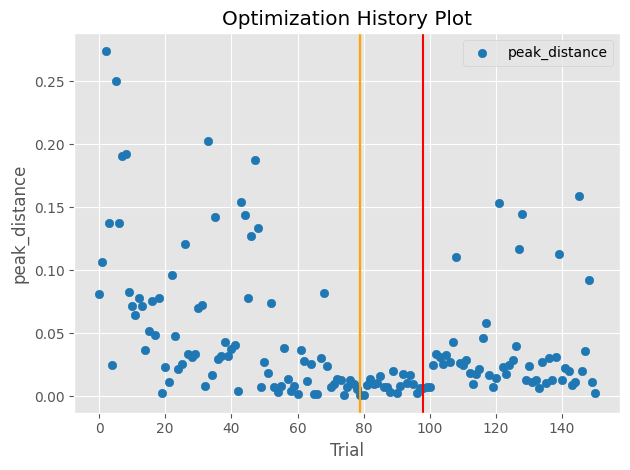

In [208]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_89192/2080699662.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")


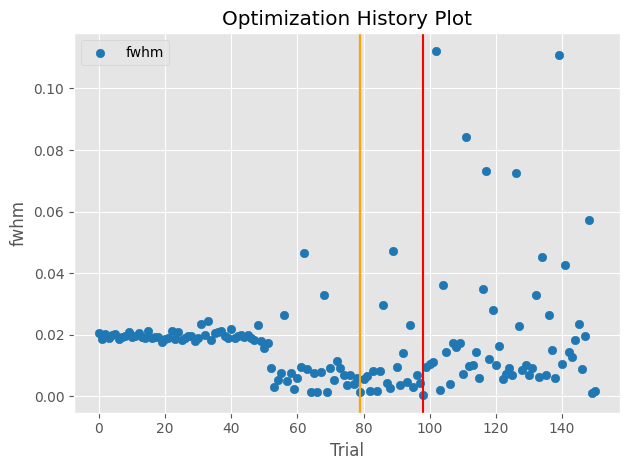

In [209]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

Trial number 79
Trial values: peak_distance 4.598e-04 fwhm 1.433e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3905670010735646, 'h_fwhm': 0.01885873089393364, 'h_centroid': 0.0005517121010972792, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.45766873625762505, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.0057594896642604865, 'v_peak': -0.00032512700273549627, 'integral_intensity': 284.9587837744583, 'peak_intensity': 65045.875, 'gaussian_fit': {}}}


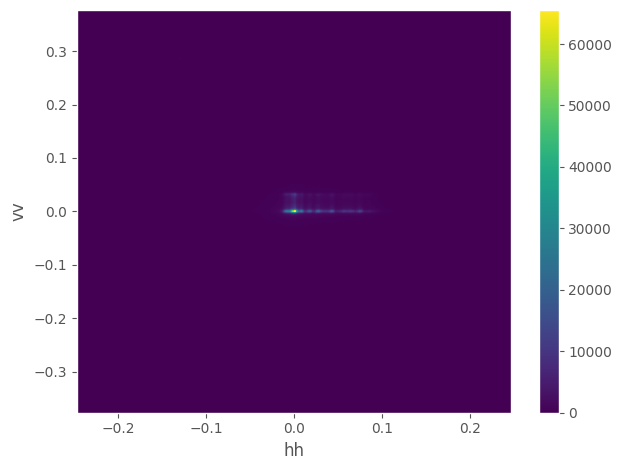

Trial number 98
Trial values: peak_distance 6.583e-03 fwhm 2.584e-04
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3906831300399076, 'h_fwhm': 0.018208429828625583, 'h_centroid': 0.0005740670810941984, 'h_peak': 0.0035766558591939883, 'v_sigma': 0.45780228752575697, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.006148491649214716, 'v_peak': -0.0055271590465025494, 'integral_intensity': 285.0382951500322, 'peak_intensity': 64420.555, 'gaussian_fit': {}}}


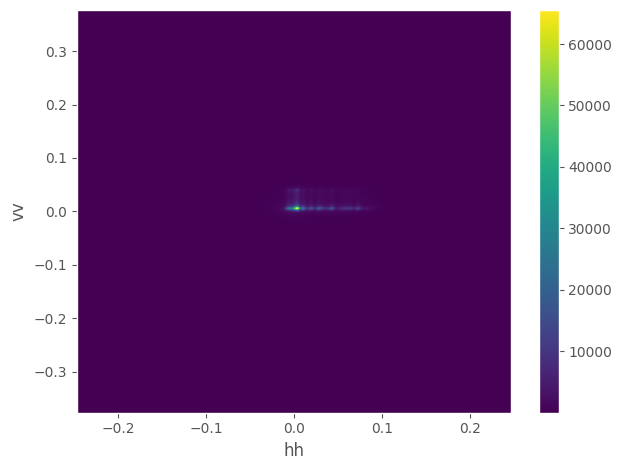

In [195]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.tight_layout()
    plt.colorbar()
    plt.show()

Result: Seems like the beam is too spread out in all the cases.

In [59]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [60]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)

[147, 133]
79 [0.00045981565522817996, 0.0014334106393386306]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3905670010735646, 'h_fwhm': 0.01885873089393364, 'h_centroid': 0.0005517121010972792, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.45766873625762505, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.0057594896642604865, 'v_peak': -0.00032512700273549627, 'integral_intensity': 284.9587837744583, 'peak_intensity': 65045.875, 'gaussian_fit': {}}}


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/2856276465.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "fwhm"], include_dominated_trials=False)


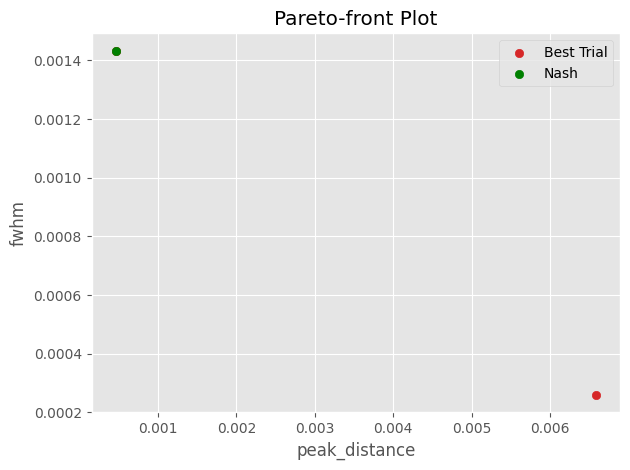

In [61]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "fwhm"], include_dominated_trials=False)
plt.scatter(*nash_trial.values, color='green', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/3765395746.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


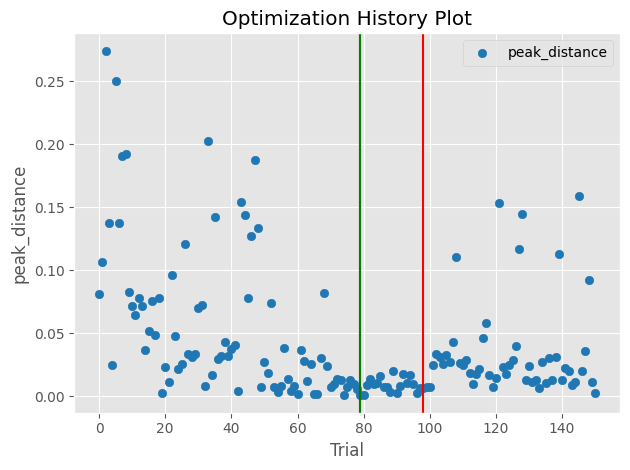

In [62]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/3053359392.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")


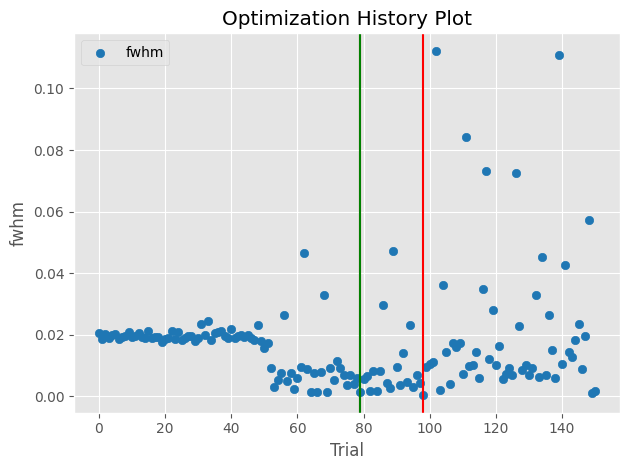

In [63]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [64]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    isum1, wsum1 = analysis.calculate_weighted_sum(h, threshold=0)
    isum2, wsum2 = analysis.calculate_weighted_sum(h)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


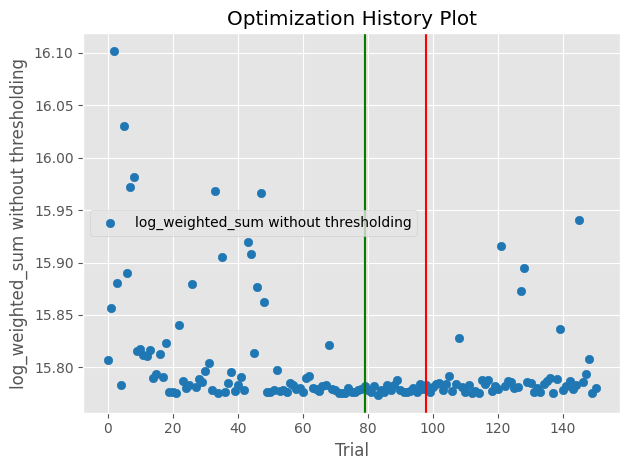

In [65]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


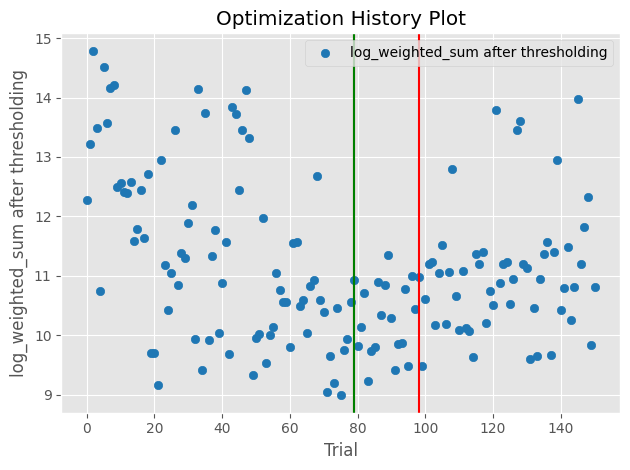

In [66]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [67]:
test_val_fns = [lambda t: t.values[0], lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1], test_val_fns)
print(np.argmax(domins))

80


19 [0.0024761212909399093, 9.708497626283531]


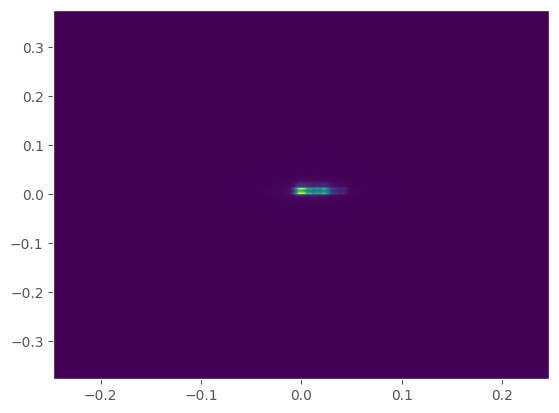

42 [0.003707119309639163, 9.685569474581012]


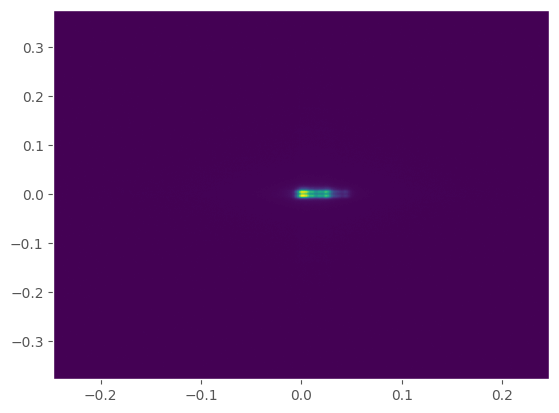

49 [0.007138387169689441, 9.326017743272079]


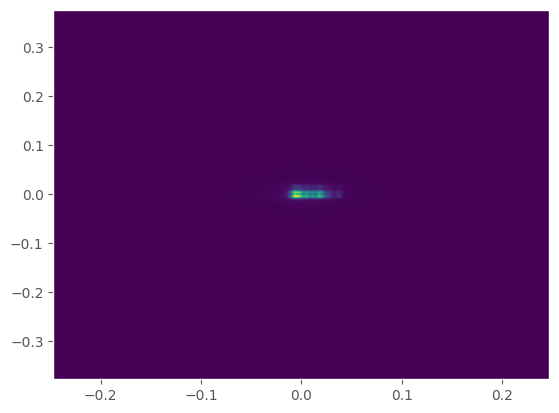

60 [0.0013794469656845396, 9.807600464924667]


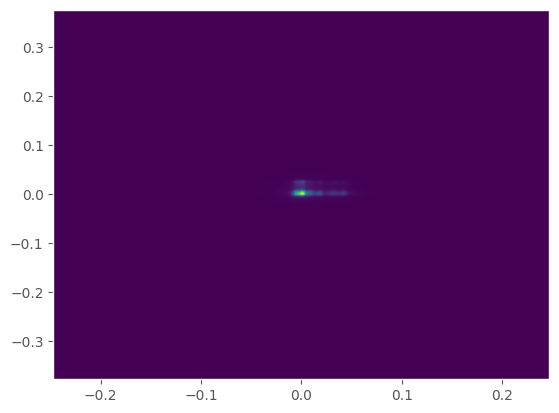

75 [0.007485158438956861, 8.986942987623676]


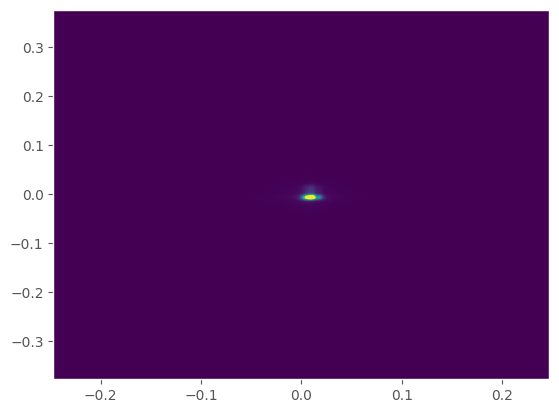

80 [0.00045981565522817996, 9.81599368346983]


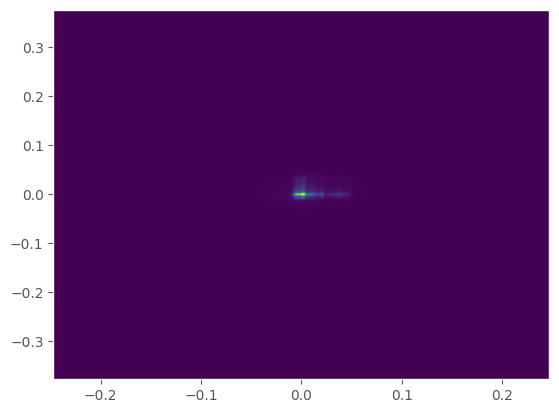

99 [0.006835404912380424, 9.481797461262829]


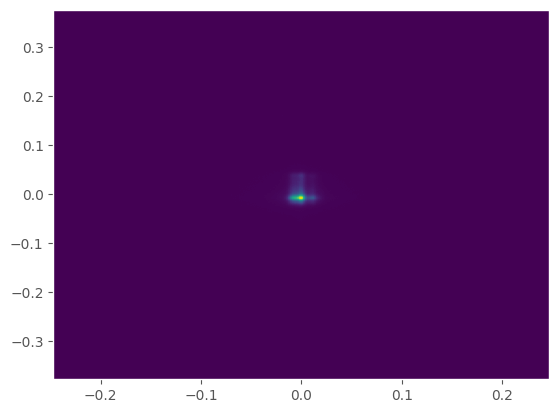

133 [0.006453853459412685, 9.658227856032969]


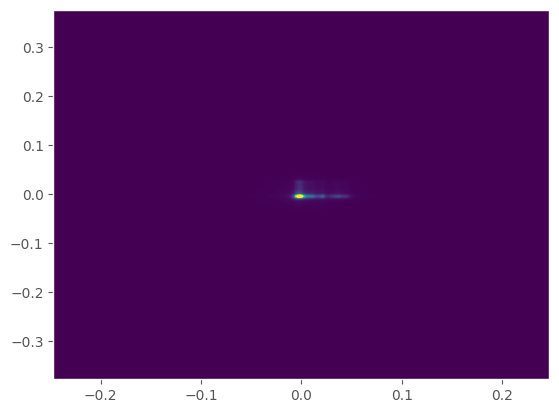

In [68]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [69]:
study.directions

[<StudyDirection.MINIMIZE: 1>, <StudyDirection.MINIMIZE: 1>]

In [70]:
test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins), domins[np.argmax(domins)])

80 113


19 [0.0024761212909399093, 0.03707250065187601, 9.708497626283531]


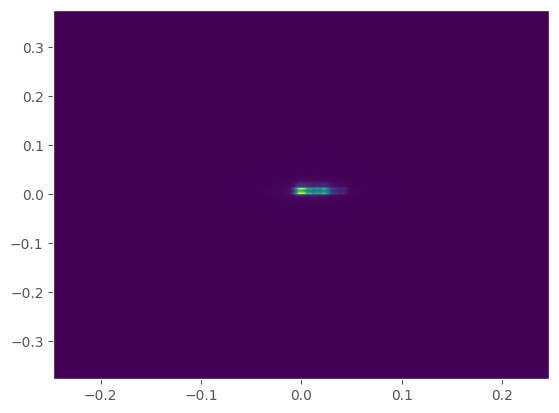

42 [0.003707119309639163, 0.038696517445970656, 9.685569474581012]


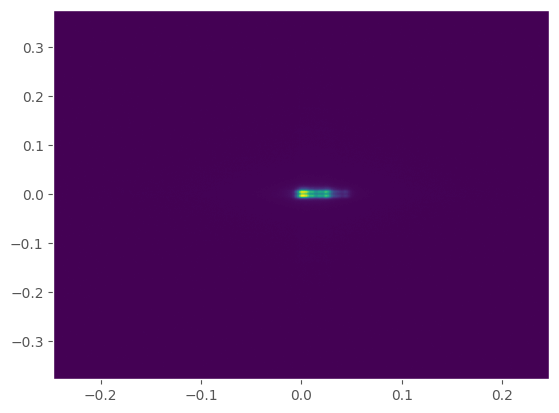

49 [0.007138387169689441, 0.03724310387604322, 9.326017743272079]


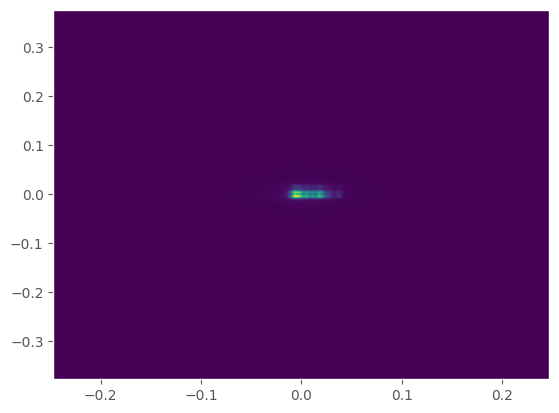

53 [0.007428363872819456, 0.016579265768677073, 9.541027331142681]


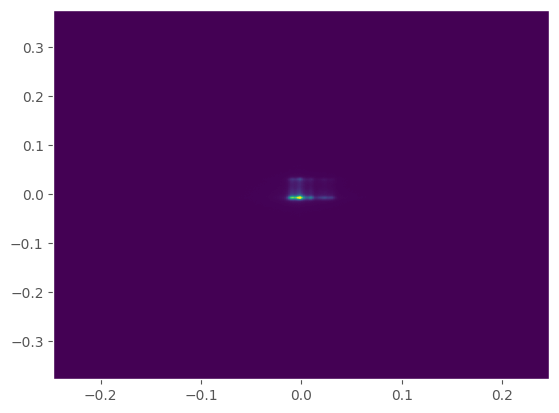

60 [0.0013794469656845396, 0.01665536369323247, 9.807600464924667]


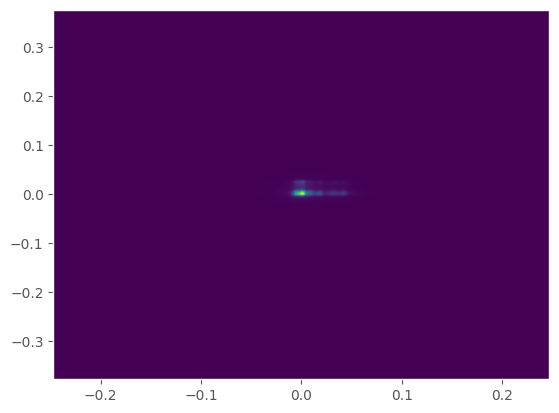

65 [0.001657944296421793, 0.013005682483180311, 10.038764882199679]


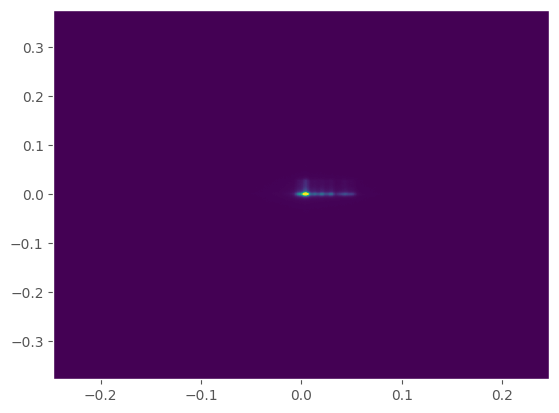

71 [0.009743099191034254, 0.015511766698927357, 9.041789789779042]


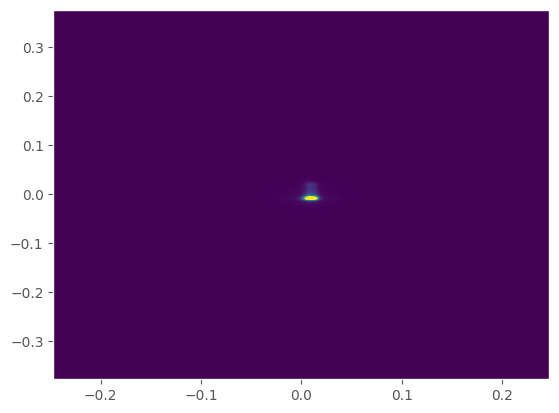

74 [0.0010282088250323164, 0.01316731177190838, 10.464950816343357]


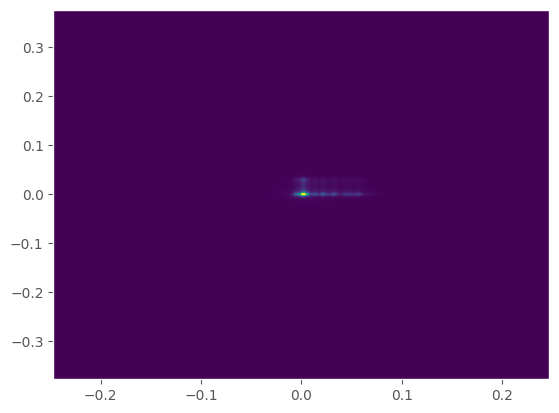

75 [0.007485158438956861, 0.01930159894284732, 8.986942987623676]


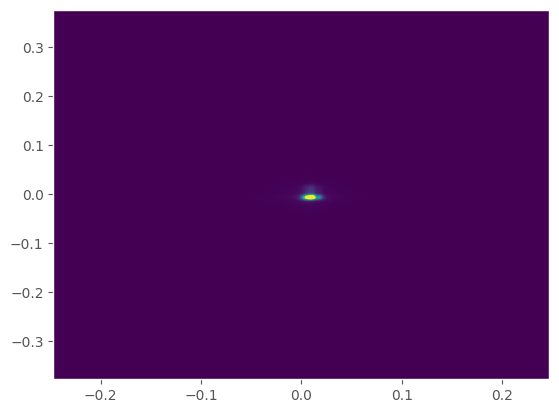

80 [0.00045981565522817996, 0.014613397338917686, 9.81599368346983]


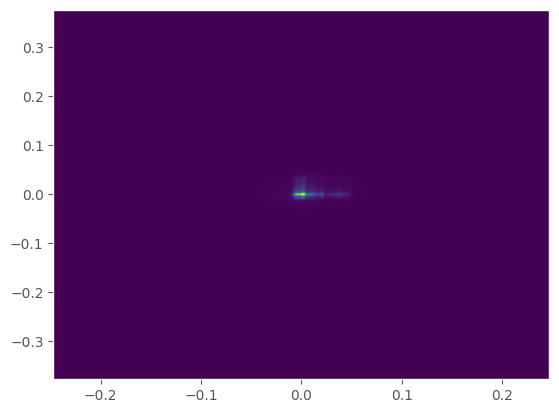

83 [0.009699755620155605, 0.01701935856999312, 9.235032427681148]


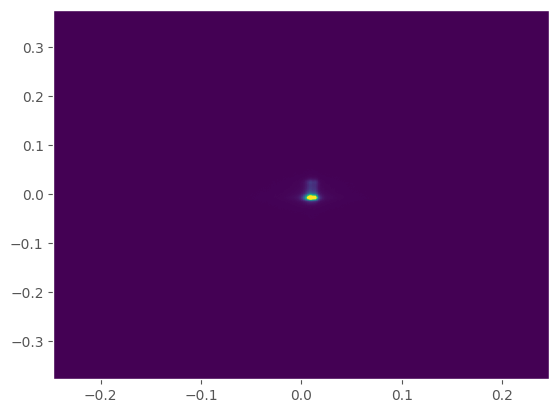

90 [0.0027969822618434796, 0.011073893725051806, 10.28537953142773]


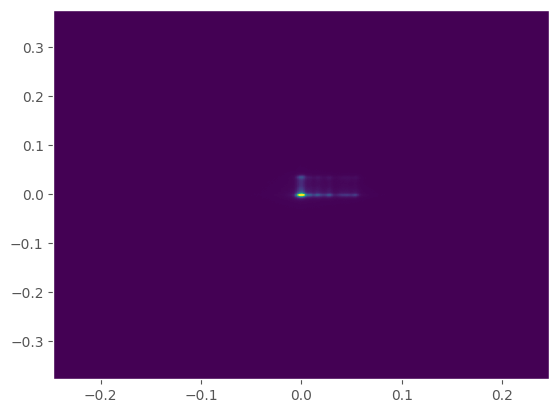

99 [0.006835404912380424, 0.021171436196469627, 9.481797461262829]


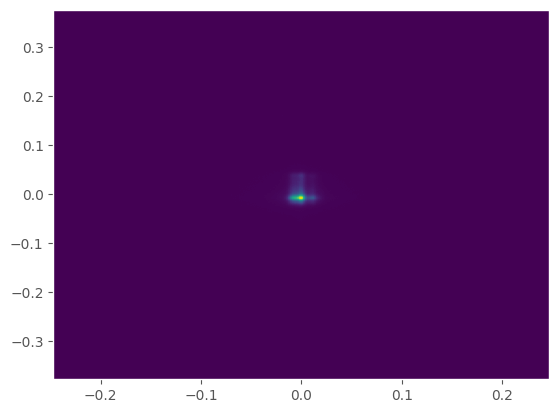

129 [0.012717677721576783, 0.010585784588079523, 11.199661955558447]


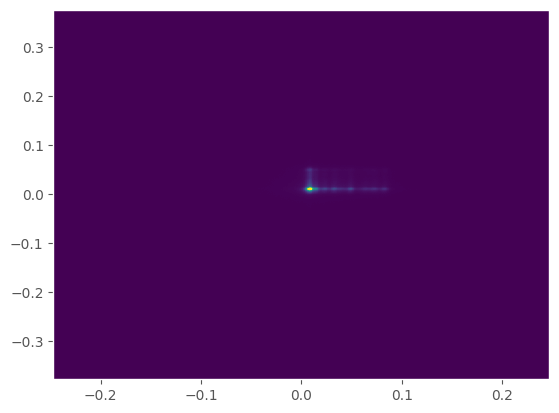

133 [0.006453853459412685, 0.014067849771378605, 9.658227856032969]


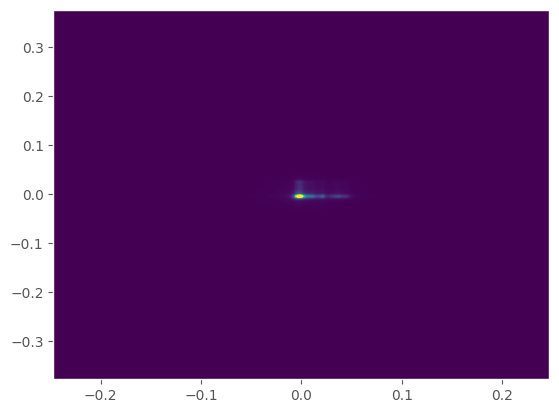

In [71]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()